This notebook contains Hovmoller plots calculated by subtracting the 202007 model output from the 201905 model output. The purpose of these is to visualize the changes between the two models. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
from scipy import io
import pickle
import cmocean
import json
import Keegan_eval_tools as ket
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [3]:
ptrcloc_201905='/ocean/kflanaga/MEOPAR/201905_ptrc_data'
gridloc_201905='/ocean/kflanaga/MEOPAR/201905_grid_data'
ptrcloc_202007='/ocean/kflanaga/MEOPAR/202007_ptrc_data'
girdloc_202007='/ocean/kflanaga/MEOPAR/202007_grid_data'

In [4]:
year=2015
mooring='Twanoh'

In [5]:
# Parameters
year = 2015
mooring = "Hansville"


In [6]:
grid_201905=xr.open_mfdataset(gridloc_201905+f'/ts_HC201905_{year}_{mooring}.nc')
grid_202007=xr.open_mfdataset(girdloc_202007+f'/ts_HC202007_{year}_{mooring}.nc')

In [7]:
tt=np.array(grid_201905.time_counter)
mod_depth=np.array(grid_201905.deptht)
mod_votemper_201905=(grid_201905.votemper.isel(y=0,x=0))
mod_vosaline_201905=(grid_201905.vosaline.isel(y=0,x=0))

mod_votemper_201905 = (np.array(mod_votemper_201905))
mod_votemper_201905 = np.ma.masked_equal(mod_votemper_201905,0).T
mod_vosaline_201905 = (np.array(mod_vosaline_201905))
mod_vosaline_201905 = np.ma.masked_equal(mod_vosaline_201905,0).T


mod_votemper_202007=(grid_202007.votemper.isel(y=0,x=0))
mod_vosaline_202007=(grid_202007.vosaline.isel(y=0,x=0))

mod_votemper_202007 = (np.array(mod_votemper_202007))
mod_votemper_202007 = np.ma.masked_equal(mod_votemper_202007,0).T
mod_vosaline_202007 = (np.array(mod_vosaline_202007))
mod_vosaline_202007 = np.ma.masked_equal(mod_vosaline_202007,0).T

## Map of Buoy Location.

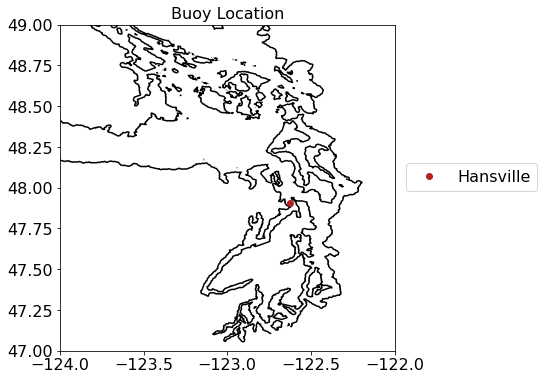

In [8]:
lon,lat=places.PLACES[mooring]['lon lat']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    viz_tools.plot_coastline(ax, bathy, coords = 'map',isobath=.1)
color=('firebrick')
ax.plot(lon, lat,'o',color = 'firebrick', label=mooring)
ax.set_ylim(47, 49)
ax.legend(bbox_to_anchor=[1,.6,0.45,0])
ax.set_xlim(-124, -122);
ax.set_title('Buoy Location');

## Temperature

In [9]:
date_range=(dt.datetime(year,1,1),dt.datetime(year,12,31))

/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools/Keegan_eval_tools.py:803: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


<AxesSubplot:title={'center':'201905-202007 Temperature Comparison'}, xlabel='Date', ylabel='Depth [m]'>

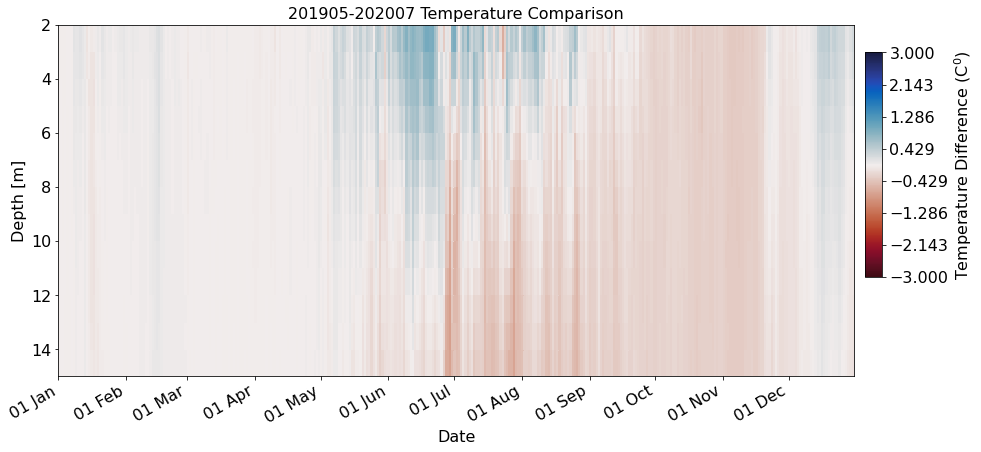

In [10]:
# Invert colormap 
ket.hovmoeller(mod_votemper_201905-mod_votemper_202007, mod_depth, tt, (2,15),date_range, title='201905-202007 Temperature Comparison',
               var_title='Temperature Difference (C$^0$)',vmax=3,vmin=-3,cmap=cmo.cm.balance_r)

# Salinity

<AxesSubplot:title={'center':'201905-202007 Salinity Comparison'}, xlabel='Date', ylabel='Depth [m]'>

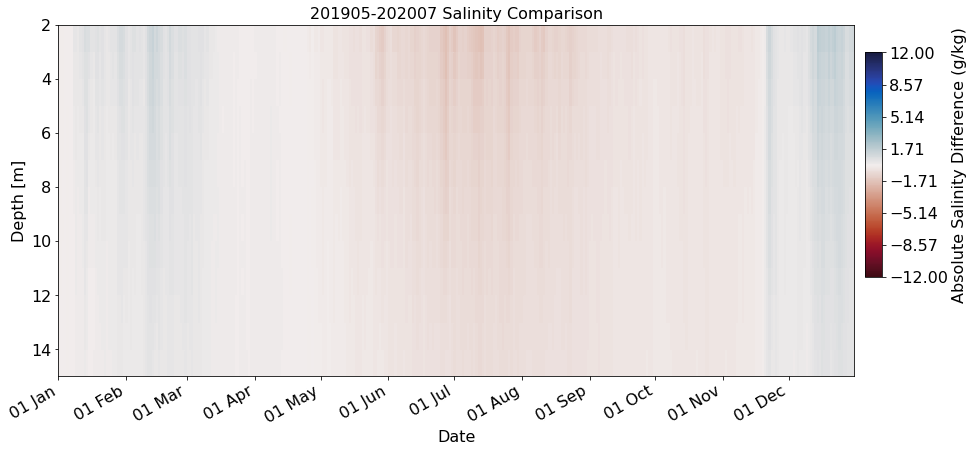

In [11]:
# Invert this colormap as well. 
ket.hovmoeller(mod_vosaline_201905-mod_vosaline_202007, mod_depth, tt, (2,15),date_range,title='201905-202007 Salinity Comparison',
               var_title='Absolute Salinity Difference (g/kg)',vmax=12,vmin=-12,cmap=cmo.cm.balance_r)

In [12]:
grid_201905.close()
grid_202007.close()

In [13]:
bio_201905=xr.open_mfdataset(ptrcloc_201905+f'/ts_HC201905_{year}_{mooring}.nc')
bio_202007=xr.open_mfdataset(ptrcloc_202007+f'/ts_HC202007_{year}_{mooring}.nc')

In [14]:
tt=np.array(bio_201905.time_counter)
mod_depth=np.array(bio_201905.deptht)
mod_flagellates_201905=(bio_201905.flagellates.isel(y=0,x=0))
mod_ciliates_201905=(bio_201905.ciliates.isel(y=0,x=0))
mod_diatoms_201905=(bio_201905.diatoms.isel(y=0,x=0))

mod_Chl_201905 = np.array((mod_flagellates_201905+mod_ciliates_201905+mod_diatoms_201905)*1.8)
mod_Chl_201905 = np.ma.masked_equal(mod_Chl_201905,0).T

mod_flagellates_202007=(bio_202007.flagellates.isel(y=0,x=0))
mod_ciliates_202007=(bio_202007.ciliates.isel(y=0,x=0))
mod_diatoms_202007=(bio_202007.diatoms.isel(y=0,x=0))

mod_Chl_202007 = np.array((mod_flagellates_202007+mod_ciliates_202007+mod_diatoms_202007)*1.8)
mod_Chl_202007 = np.ma.masked_equal(mod_Chl_202007,0).T

/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools/Keegan_eval_tools.py:803: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


<AxesSubplot:title={'center':'201905-202007 Chlorophyll Comparison'}, xlabel='Date', ylabel='Depth [m]'>

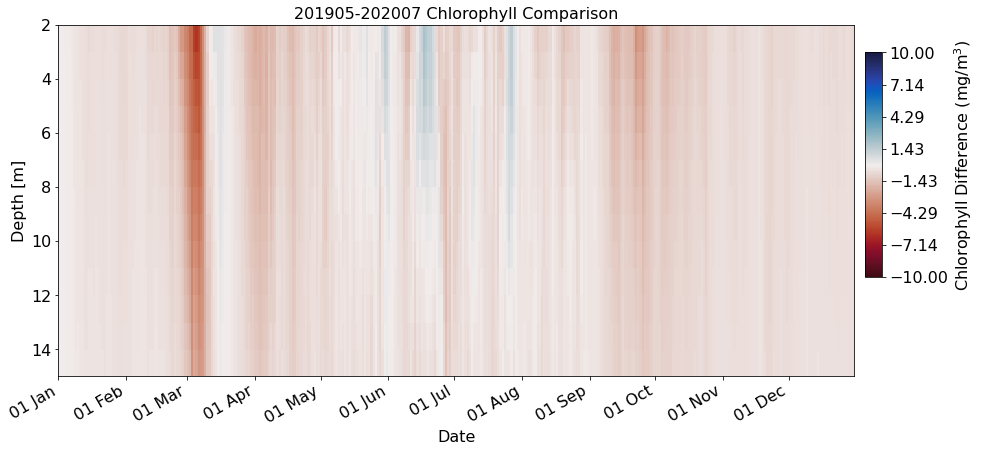

In [15]:
ket.hovmoeller(mod_Chl_201905-mod_Chl_202007, mod_depth, tt, (2,15),date_range,title='201905-202007 Chlorophyll Comparison',
               var_title='Chlorophyll Difference (mg/m$^3$)',vmax=10,vmin=-10,cmap=cmo.cm.balance_r)

In [16]:
bio_201905.close()
bio_202007.close()